<a href="https://colab.research.google.com/github/chaiminwoo0223/Advanced-Machine-Learning/blob/main/04%20-%20Training_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import

In [1]:
import numpy as np
import os
%matplotlib inline
import  matplotlib as mpl
import  matplotlib.pyplot as plt

# 선형 회귀

##정규방정식
$\hat{\boldsymbol{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

In [2]:
X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

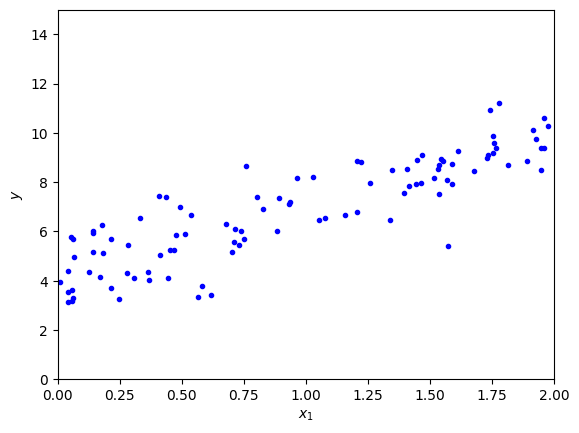

In [3]:
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([0, 2, 0, 15])
plt.show()

$\hat{y} = \mathbf{X} \boldsymbol{\hat{\theta}}$

In [4]:
X_b = np.c_[np.ones((100,1)),X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.16220412],
       [2.83924373]])

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.16220412],
       [9.84069159]])

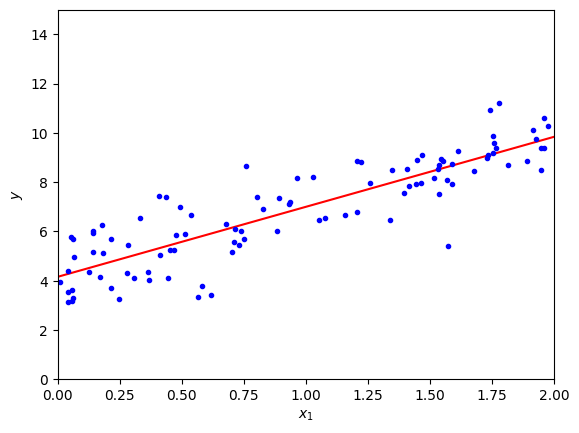

In [6]:
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X,y,"b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$")
plt.axis([0, 2, 0, 15])
plt.show()

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)

LinearRegression()

In [8]:
lin_reg.intercept_, lin_reg.coef_

(array([4.16220412]), array([[2.83924373]]))

In [9]:
lin_reg.predict(X_new)

array([[4.16220412],
       [9.84069159]])

In [10]:
theta_best_svd, residuals, ranks, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.16220412],
       [2.83924373]])

$\boldsymbol{\hat{\theta}} = \mathbf{X}^+\mathbf{y}$

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.16220412],
       [2.83924373]])

# 경사 하강법

## 1.배치 경사 하강법

**비용 함수의 그레이디언트 벡터**

$
\dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
 = \dfrac{2}{m} \mathbf{X}^T (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$

**경사 하강법의 스텝**

$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \dfrac{\partial}{\partial \boldsymbol{\theta}} \text{MSE}(\boldsymbol{\theta})
$

In [12]:
eta = 0.1 # 학습률
n_iter = 1000
m = 100
theta = np.random.randn(2,1) # 랜덤 초기화

for iter in range(n_iter):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

In [13]:
theta

array([[4.16220412],
       [2.83924373]])

In [14]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iter = 1000

    for iter in range(n_iter):
        if iter < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iter > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$X_1$")
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta))

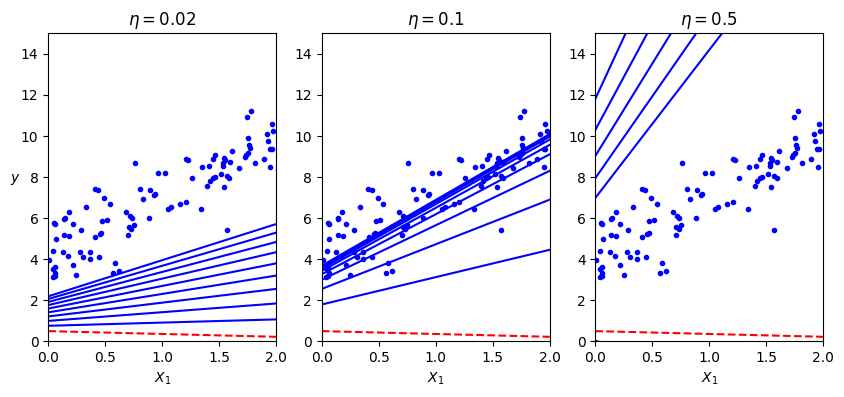

In [15]:
np.random.seed(42)
theta = np.random.randn(2,1) # 랜덤 초기화
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta = 0.02)
plt.ylabel("$y$", rotation=0)
plt.subplot(132); plot_gradient_descent(theta, eta = 0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta = 0.5)
plt.show()

## 2.확률적 경사 하강법(SGD)

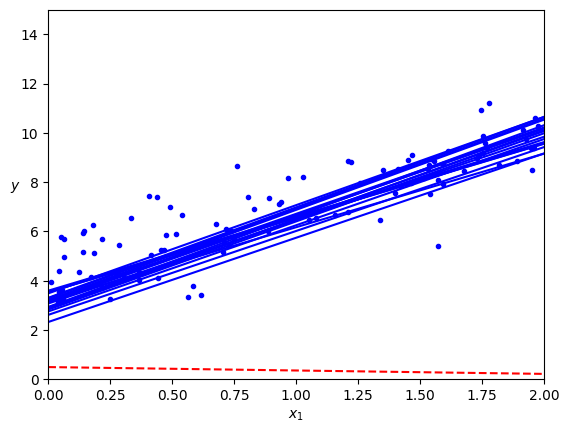

In [16]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)
n_epochs = 50
theta = np.random.randn(2,1) # 랜덤 초기화
t0, t1 = 5, 50               # 학습 스케줄 파라미터

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.show()

In [17]:
theta

array([[4.20982768],
       [2.86140352]])

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, penalty=None, random_state=42)

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17931561]), array([2.87600897]))

## 3.미니배치 경사 하강법

In [20]:
theta_path_mgd = []
n_iter = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1) # 랜덤 초기화
t0, t1 = 200, 1000            # 학습 스케줄 파라미터

def learning_schedule(t):
    return t0 / (t + t1)

t= 0
for epoch in range(n_iter):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

In [21]:
theta

array([[4.21009703],
       [2.88479241]])

In [22]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

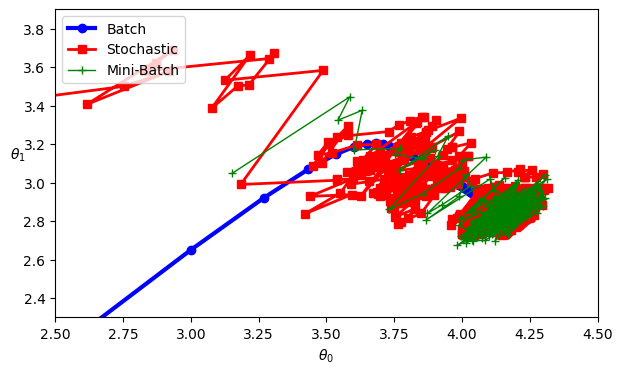

In [23]:
plt.figure(figsize=(7,4))
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=2, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$", rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()